In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix

In [5]:
path = '/Users/learnersgalaxy/Downloads/To Be Shared with Indigo team/Airlines-Projects/Machine Learning/Exercises for Indigo/Baggage Prediction/customer_booking.csv'

In [6]:
df = pd.read_csv(path,encoding="latin-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [7]:
df = pd.get_dummies(df,columns=['sales_channel','trip_type','flight_day','route', 'booking_origin'],drop_first = True)

In [8]:
x=df.drop('wants_extra_baggage',axis=1)
y=df['wants_extra_baggage']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)

In [13]:
model = xgb.XGBClassifier()  
# for multiclass classfication - multi:softmax, , num_class=2
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7323333333333333


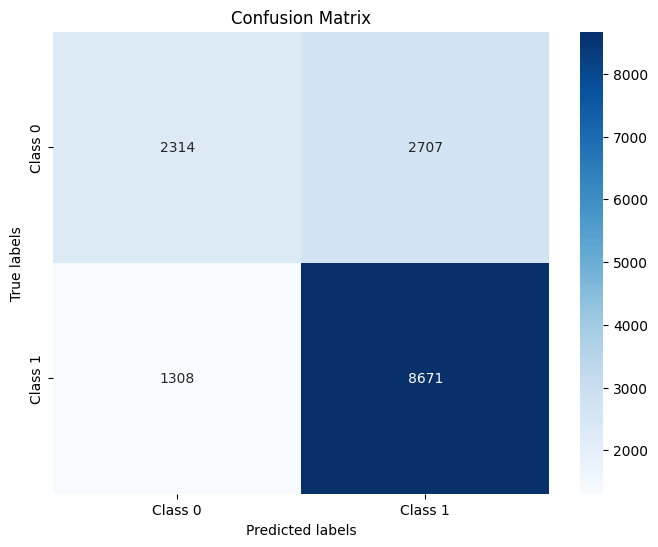

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score

In [20]:
missing_pct = 0.03
df['length_of_stay'] = df['length_of_stay'].mask(np.random.random(len(df)) < missing_pct)

In [24]:
df_cat = df.select_dtypes(include='object').columns
df_num = df.select_dtypes(exclude='object').columns

In [25]:
num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std', StandardScaler())])

In [27]:
preprocessing = ColumnTransformer([('num',num_pipeline,df_num),('cat',OneHotEncoder(),df_cat)])

In [28]:
xgb_class = XGBClassifier()

In [30]:
final_pipeline = Pipeline([('preprocessing',preprocessing),('xgb',xgb_class)])

In [31]:
gbm_params = {
    
    'xgb__n_estimators':[40,50,60,70],
    'xgb__max_depth':[3,4,5,6,7],
    'xgb__learning_rate':[.1,.01,.05,.07,.8],
    'xgb__colsample_bytree':[.4,.5,.7]
    
}

In [32]:
X = df.drop(columns = 'wants_extra_baggage')
y = df.wants_extra_baggage

In [33]:
final_pipeline.fit(df,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channe...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [35]:
from joblib import dump, load

In [36]:
dump(final_pipeline, 'final_pipeline.joblib')

['final_pipeline.joblib']

In [37]:
clss = load('final_pipeline.joblib')

In [38]:
clss.predict(df)

array([1, 0, 1, ..., 0, 1, 0])

In [40]:
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



gbm_params = {

    'xgb__n_estimators':[40,50,60,70],
    'xgb__max_depth':[3,4,5,6,7],
    'xgb__learning_rate':[.1,.01,.05,.07,.8],
    'xgb__colsample_bytree':[.4,.5,.7]

}

history = []

X = df.drop(columns = 'wants_extra_baggage')
y = df.wants_extra_baggage

pointer = 1
for train_index, test_index in cv_outer.split(X, y):
    print('\nNestedCV: {} of outer fold {}'.format(pointer, cv_outer.get_n_splits()))
    x_train, x_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]


    X_cat = x_train.select_dtypes(include='object').columns
    X_num = x_train.select_dtypes(exclude='object').columns

    num_pipeline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std', StandardScaler())])
    preprocessing = ColumnTransformer([('num',num_pipeline,X_num),('cat',OneHotEncoder(),X_cat)])

    xgb_class = XGBClassifier(n_jobs=-1)
    
    final_pipeline = Pipeline([('preprocessing',preprocessing),('xgb',xgb_class)])

    model = RandomizedSearchCV(final_pipeline, param_distributions=gbm_params,
                               cv=cv_inner, n_jobs=-1)
    model.fit(x_train, y_train)

    pred_test = model.predict(x_test)
    pred_training = model.predict(x_train)

    acc_train = accuracy_score(y_train, pred_training)
    acc_test = accuracy_score(y_test, pred_test)

    print("""
    Best set of parameters: {}
    Best acc_train              : {:.2f}

    Training
        acc_train: {:.3f}
    Test
        acc_test: {:.3f}
    """.format(
        model.best_params_,
        model.best_score_,
        acc_train,
        acc_test,
        )
    )
    history.append(acc_test)
    pointer += 1


NestedCV: 1 of outer fold 5

    Best set of parameters: {'xgb__n_estimators': 60, 'xgb__max_depth': 7, 'xgb__learning_rate': 0.07, 'xgb__colsample_bytree': 0.5}
    Best acc_train              : 0.73

    Training
        acc_train: 0.752
    Test
        acc_test: 0.733
    

NestedCV: 2 of outer fold 5

    Best set of parameters: {'xgb__n_estimators': 50, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.5}
    Best acc_train              : 0.73

    Training
        acc_train: 0.733
    Test
        acc_test: 0.730
    

NestedCV: 3 of outer fold 5

    Best set of parameters: {'xgb__n_estimators': 60, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.4}
    Best acc_train              : 0.73

    Training
        acc_train: 0.746
    Test
        acc_test: 0.735
    

NestedCV: 4 of outer fold 5

    Best set of parameters: {'xgb__n_estimators': 50, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.7}
   

In [41]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split()